#Logistic Regression in Practice

In this session, we shall apply logistic regression and look at predictions using it.

In [ ]:
#First, we import the required packages
import pandas as pd #the pandas library is useful for data processing 
import numpy as np #numpy package will be useful for numerical computations
import matplotlib.pyplot as plt #the matplotlib library is useful for plotting purposes

# The following python directive helps to plot the graph in the notebook directly
%matplotlib inline

Now let us consider some open source data sets available in the internet.

In [ ]:
from sklearn.datasets import load_iris  #importing the load_iris class
iris_data = load_iris() #loading the iris dataset in iris_data

print(iris_data['DESCR']) #checking out the description of the dataset

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
X = iris_data['data'][:,:2]
print(X)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

From the description, it is clear that *iris* dataset consists of essentially 3 classes: *Iris-Setosa*, *Iris-Versicolour*, *Iris-Virginica*. As logistic regression has been introduced as a binary classifier, we can alter the data into a binary classification problem based on finding whether a flower belongs to *Iris-Virginica* or not. In order to do that, we change the labels $\{0,1\}$ to $0$ and 2 to 1.

In [ ]:
y = iris_data['target'] 
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
#X_train_scikitlearn = X_train[0:10]
#X_train = X_train[0:10]

#y_train = y_train[0:10]
print('Size of training set:', len(X_train))
n = len(X_train)
print('Size of testing set:', len(X_test))
print('y train:')
print(y_train)
print('y test:')
print(y_test)

Size of training set: 105
Size of testing set: 45
y train:
[2 0 0 0 1 0 0 2 2 2 2 2 1 2 1 0 2 2 0 0 2 0 2 2 1 1 2 2 0 1 1 2 1 2 1 0 0
 0 2 0 1 2 2 0 0 1 0 2 1 2 2 1 2 2 1 0 1 0 1 1 0 1 0 0 2 2 2 0 0 1 0 2 0 2
 2 0 2 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 2 0 0 2 1 2 1 2 2 1 2 0]
y test:
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]


In [ ]:
# impoet linear Regression with L2 Regularization from Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge,RidgeCV
from sklearn.linear_model import Lasso,LassoCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import validation_curve

# **Implement unregularised logistic Regression**

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.76


# **Implement L2 regularised Logistic Regression**

L2 regularised logistic regression

In [ ]:
# Split Dataset into train and test dataset using sklearn
from sklearn.model_selection import train_test_split
X_train_initial, X_test, y_train_initial, y_test = train_test_split(X, y, test_size=0.2, random_state=2000)
print(len(X_train_initial), len(X_test), len(y_train_initial), len(y_test))

120 30 120 30


In [ ]:
pipeline = make_pipeline(LogisticRegression(solver='lbfgs', penalty='l2', max_iter=10000, random_state=1))
#
# Get Training and test scores using validation curve method
# Pay attention to the parameter values range set as param_range
#
param_range = [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000,1e5]
train_scores, val_scores = validation_curve(estimator=pipeline,
                                             X=X_train_initial, y=y_train_initial,
                                             cv=10,
param_name='logisticregression__C', param_range=param_range)
print('train scores:',train_scores)
print('val scores:',val_scores)

print('Printing more details of scores for each alpha:')
for i in range(len(param_range)):
  print('alpha:', param_range[i])
  print('train scores:', train_scores[i])
  print('val scores:', val_scores[i])
  print('**************************')

train scores: [[0.35185185 0.35185185 0.35185185 0.35185185 0.35185185 0.35185185
  0.35185185 0.35185185 0.34259259 0.34259259]
 [0.35185185 0.35185185 0.35185185 0.35185185 0.35185185 0.35185185
  0.35185185 0.35185185 0.34259259 0.34259259]
 [0.35185185 0.35185185 0.35185185 0.35185185 0.35185185 0.35185185
  0.35185185 0.35185185 0.49074074 0.5       ]
 [0.7037037  0.72222222 0.72222222 0.73148148 0.7037037  0.7037037
  0.7037037  0.71296296 0.75925926 0.76851852]
 [0.81481481 0.80555556 0.81481481 0.80555556 0.80555556 0.78703704
  0.7962963  0.83333333 0.82407407 0.82407407]
 [0.80555556 0.80555556 0.81481481 0.81481481 0.80555556 0.81481481
  0.81481481 0.82407407 0.83333333 0.82407407]
 [0.82407407 0.82407407 0.82407407 0.82407407 0.82407407 0.82407407
  0.81481481 0.83333333 0.83333333 0.83333333]
 [0.82407407 0.82407407 0.82407407 0.82407407 0.81481481 0.82407407
  0.81481481 0.84259259 0.84259259 0.83333333]
 [0.82407407 0.82407407 0.82407407 0.82407407 0.81481481 0.81481481

In [ ]:
#print(train_scores.shape)
avg_train_scores = np.mean(train_scores,axis=1)
avg_val_scores = np.mean(val_scores,axis=1)
print('average train scores :',avg_train_scores)
print('average val scores :',avg_val_scores)

average train scores : [0.35       0.35       0.38055556 0.72314815 0.81111111 0.81574074
 0.82592593 0.82685185 0.82592593 0.82685185 0.82685185]
average val scores : [0.35       0.35       0.38333333 0.7        0.79166667 0.8
 0.81666667 0.81666667 0.81666667 0.825      0.825     ]


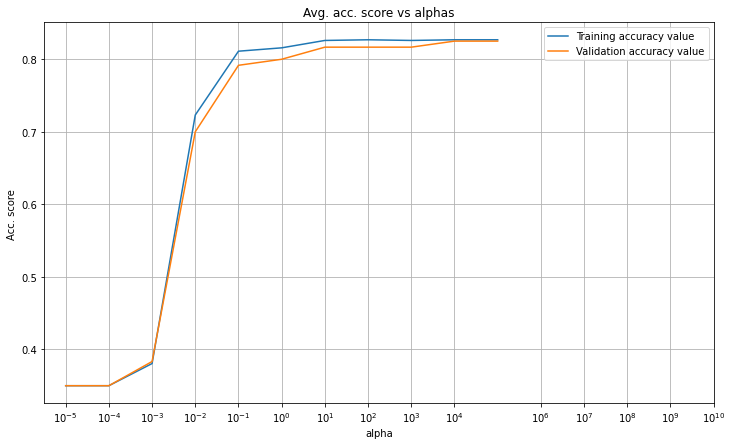

In [ ]:
plt.figure(figsize =(12,7))

plt.plot(param_range,avg_train_scores,label = "Training accuracy value")
plt.plot(param_range, avg_val_scores,label = "Validation accuracy value")
plt.xlabel('alpha')
plt.ylabel('Acc. score ')
plt.title("Avg. acc. score vs alphas")
plt.xscale('log')
plt.grid()
plt.legend()
plt.xticks( [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000,1e6,1e7,1e8,1e9,1e10])
plt.show()



In [ ]:
#best alpha

best_alpha = param_range[np.argmax(avg_val_scores)]
print('best alpha from 10 fold CV:',best_alpha)

best alpha from 10 fold CV: 10000


#Taking best alpha and training on full train data

In [ ]:
clf = LogisticRegression(solver='lbfgs', penalty='l2', C = best_alpha, max_iter=10000, random_state=1)

clf.fit(X_train_initial, y_train_initial)

for k in np.unique(y):
  print('class:',k, 'coefficients:', clf.coef_[k])


class: 0 coefficients: [-21.41032508  18.21348747]
class: 1 coefficients: [ 9.71261034 -9.34977803]
class: 2 coefficients: [11.69771473 -8.86370944]


# Evaluating the performance on full train and test data

---



In [ ]:
train_score = clf.score(X_train_initial, y_train_initial)

test_score = clf.score(X_test, y_test)

print('Train accuracy:',train_score)
print('Test accuracy:',test_score)


Train accuracy: 0.825
Test accuracy: 0.8


# **Implement L1 regularized Logistic Regression**

In [ ]:
pipeline = make_pipeline(LogisticRegression(solver='saga', penalty='l1', max_iter=10000, random_state=1))
#
# Get Training and test scores using validation curve method
# Pay attention to the parameter values range set as param_range
#
param_range = [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000,1e5]
train_scores, val_scores = validation_curve(estimator=pipeline,
                                             X=X_train_initial, y=y_train_initial,
                                             cv=10,
param_name='logisticregression__C', param_range=param_range)
print('train scores:',train_scores)
print('val scores:',val_scores)

print('Printing more details of scores for each alpha:')
for i in range(len(param_range)):
  print('alpha:', param_range[i])
  print('train scores:', train_scores[i])
  print('val scores:', val_scores[i])
  print('**************************')

train scores: [[0.33333333 0.35185185 0.35185185 0.33333333 0.35185185 0.33333333
  0.33333333 0.35185185 0.33333333 0.33333333]
 [0.33333333 0.35185185 0.35185185 0.33333333 0.35185185 0.33333333
  0.33333333 0.35185185 0.33333333 0.33333333]
 [0.33333333 0.35185185 0.35185185 0.33333333 0.35185185 0.33333333
  0.33333333 0.35185185 0.33333333 0.33333333]
 [0.35185185 0.35185185 0.35185185 0.35185185 0.35185185 0.33333333
  0.35185185 0.35185185 0.34259259 0.34259259]
 [0.76851852 0.77777778 0.77777778 0.78703704 0.75925926 0.75925926
  0.76851852 0.77777778 0.78703704 0.77777778]
 [0.81481481 0.82407407 0.81481481 0.82407407 0.81481481 0.82407407
  0.81481481 0.83333333 0.83333333 0.82407407]
 [0.82407407 0.82407407 0.82407407 0.82407407 0.82407407 0.82407407
  0.81481481 0.84259259 0.84259259 0.83333333]
 [0.82407407 0.81481481 0.81481481 0.81481481 0.80555556 0.81481481
  0.80555556 0.83333333 0.84259259 0.82407407]
 [0.82407407 0.81481481 0.81481481 0.81481481 0.80555556 0.8148148

In [ ]:
#print(train_scores.shape)
avg_train_scores = np.mean(train_scores,axis=1)
avg_val_scores = np.mean(val_scores,axis=1)
print('average train scores :',avg_train_scores)
print('average val scores :',avg_val_scores)

average train scores : [0.34074074 0.34074074 0.34074074 0.34814815 0.77407407 0.82222222
 0.82777778 0.81944444 0.81944444 0.81944444 0.81944444]
average val scores : [0.33333333 0.33333333 0.33333333 0.35       0.76666667 0.81666667
 0.81666667 0.81666667 0.81666667 0.81666667 0.81666667]


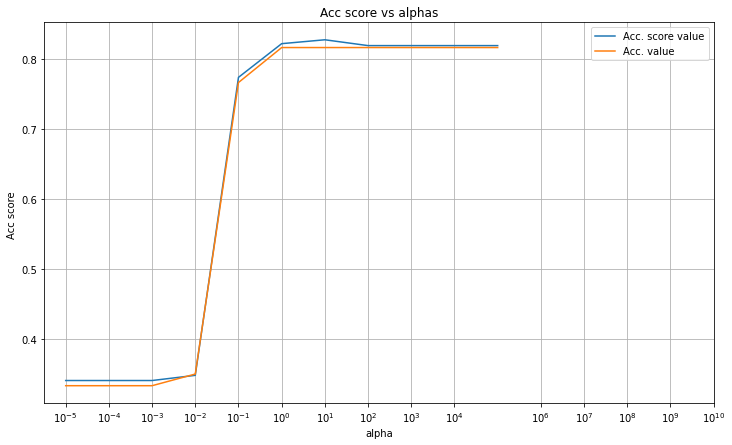

In [ ]:
plt.figure(figsize =(12,7))

plt.plot(param_range,avg_train_scores,label = "Acc. score value")
plt.plot(param_range, avg_val_scores,label = "Acc. value")
plt.xlabel('alpha')
plt.ylabel('Acc score ')
plt.title("Acc score vs alphas")
plt.xscale('log')
plt.grid()
plt.legend()
plt.xticks( [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000,1e6,1e7,1e8,1e9,1e10])
plt.show()

In [ ]:
#best alpha

best_alpha = param_range[np.argmax(avg_val_scores)]
print('best alpha from 5 fold CV:',best_alpha)

best alpha from 5 fold CV: 1


#Training on full data

In [ ]:
clf = LogisticRegression(solver='saga', penalty='l1', C=best_alpha, max_iter=10000, random_state=1)

clf.fit(X_train_initial, y_train_initial)

for k in np.unique(y):
  print('class:',k, 'coefficients:', clf.coef_[k])


class: 0 coefficients: [-4.16137514  4.55336301]
class: 1 coefficients: [ 0.         -0.55129475]
class: 2 coefficients: [1.63033323 0.        ]


# Evaluating the performance on full train data and test data

---


In [ ]:
train_score = clf.score(X_train_initial, y_train_initial)

test_score = clf.score(X_test, y_test)

print('Train accuracy:',train_score)
print('Test accuracy:',test_score)


Train accuracy: 0.8166666666666667
Test accuracy: 0.8
